# DRISSI KAITOUNI Smail \& SEYDI Ibrahim - Projet de Modèles Génératifs

## Variational Inference : A Review for Statisticians

### Présentation du contexte de l'article

L'article "Variational Inference: A Review for Statisticians" présente une analyse approfondie de l'inférence variationnelle (VI), une méthode d'approximation de densités de probabilité complexes, essentielle en statistiques bayésiennes. L'article met en lumière l'inférence variationnelle comme un outil puissant pour les statisticiens, idéal pour les applications nécessitant des approximations rapides. Toutefois, il appelle à une exploration plus rigoureuse des limitations et des potentialités de VI, encourageant ainsi la recherche dans ce domaine pour surmonter ses défis inhérents et améliorer sa précision et sa fiabilité.

#### Problème considéré

Un défi majeur en statistiques bayésiennes réside dans le calcul des densités de probabilité, en particulier pour les modèles complexes. L'inférence bayésienne vise à déterminer la distribution de probabilité des paramètres inconnus d'un modèle à partir des données observées. Cette distribution est appelée distribution a posteriori et son calcul implique l'évaluation de densités de probabilité complexes. 

Les techniques traditionnelles comme le Markov Chain Monte Carlo (MCMC) sont souvent utilisées pour approximer la distribution a posteriori. Si elles sont précises, ces méthodes peuvent être lentes et difficiles à mettre à l'échelle pour des ensembles de données volumineux. L'inférence variationnelle offre une alternative prometteuse en reformulant le problème d'inférence comme un problème d'optimisation. Cette approche consiste à minimiser la divergence de Kullback-Leibler entre la distribution a posteriori exacte et une famille proposée de densités approximatives.

#### Type de données

L'article met en avant la large applicabilité de l'inférence variationnelle (VI) en la mettant en oeuvre dans divers domaines tels que l'analyse de documents à grande échelle, la neuroscience computationnelle et la vision par ordinateur. Cette diversité d'applications démontre la polyvalence de la VI et sa capacité à traiter des ensembles de données massifs et des modèles complexes.

Un modèle bayésien typique utilise des variables latentes pour modéliser les distributions des données observées. L'inférence bayésienne consiste à calculer la distribution a posteriori des paramètres du modèle et des variables latentes, conditionnellement aux données observées.

#### Limite des approches existantes

Les méthodes existantes telles que MCMC sont reconnues pour leur précision mais souffrent d'une grande intensité de calcul et d'une mauvaise échelle avec de grands ensembles de données. L'article positionne VI comme une méthode plus rapide et plus adaptable aux grands ensembles de données, tout en reconnaissant que l'inférence variationnelle a été moins rigoureusement étudiée que MCMC, particulièrement en ce qui concerne ses propriétés statistiques.

### Plan du projet

A travers ce projet, dans un premier temps nous allons présenter formellement l'inférence variationnelle avec son approche la plus répandue (CAVI). Ensuite, nous étudierons l'exemple de mélange bayésien de gaussiennes, avec une implémentation. Enfin, nous nous intéresserons à l'application de la méthode variationnelle CAVI dans le cas particulier d'un modèle de régression linéaire bayésien. 

##### Importation des packages utilisés dans le projet

In [1]:
#Packages

import numpy as np
import matplotlib.pyplot as plt
import matplotlib
import pandas as pd
import random
from scipy.special import gamma, gammaln
from scipy import stats
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import seaborn as sns

### I - INFERENCE VARIATIONNELLE

Considérons un couple de variables aléatoires $(Y,X)$ dans  $R^d$ × $R^m$. Supposons que la loi de ce couple possède une densité notée $(y, x) \mapsto p(y, x)$ par rapport à une mesure de référence. Notre intérêt se porte sur la distribution a posteriori $p(y \vert x)$, où $X$ est observée et $Y$ est à estimer. Toutefois, il est souvent difficile d'obtenir directement cette distribution a posteriori, principalement à cause de l'impossibilité de calculer le dénominateur $p(x)$, appelé évidence. Cette évidence, qui requiert l'intégration des variables latentes hors de la densité jointe $p(y, x)$, est souvent intractable, surtout pour des modèles complexes où cette intégration requiert un temps exponentiel.

L'inférence variationnelle propose une solution à ce problème en introduisant un ensemble de densités $\mathcal{D}$ = $\left\{ q_\phi  \right\}_{\phi \in \Phi }$​, où $\Phi$ est un espace de paramètres judicieusement choisi. Les densités $q_\phi \left(y\right)$​ cherchent à approcher la fonction $y \mapsto p(y \vert x)$.

Pour mesurer la différence entre $q_\phi \left(y\right)$​ et $p(y \vert x)$, on utilise la divergence de Kullback-Leibler (KL), définie comme suit :$$
    \mathcal{D}_{KL}\left(q_\phi \left(y\right) \| p(y \vert x) \right) = \int q_\phi \left(y\right) \operatorname{log}\left(\frac{q_\phi(y)}{p(y \vert x)}\right)\; dy = \int q_\phi(y) \operatorname{log}\left(\frac{q_\phi(y)p(x)}{p(x,y)}\right)\; dy = \int q_\phi(y) \left( \operatorname{log}\left(\frac{q_\phi(y)}{p(x,y)}\right) + \operatorname{log}(p(x)) \right) \; dy \\= -ELBO(q_\phi) + \operatorname{log}(p(x)),
    $$
où $\operatorname{log} p(x)$ étant constant.

Minimiser $\mathcal{D}_{KL}\left(q_\phi \left(y\right) \| p(y \vert x) \right)$ est équivalent à maximiser $ELBO(q_\phi)$. Ainsi, en inférence variationnelle, on cherche alors à approximer $p(y \vert x)$ par $q_{\phi_*}$​​, où :$$
    \phi_* = arg \underset{\phi \in \Phi}{max} ELBO(q_\phi) \\ 
    $$

L'approche la plus courante pour résoudre ce problème est l'approche CAVI (Coordinate Ascent Variational Inference) que nous détaillerons par la suite. On choisit une famille variationnelle mean-field $\mathcal{D}$ de sorte que :
$$ \mathcal{D} = \left\{y \mapsto q_\phi(y) = \prod q_\phi^j(y_j) \; , \;\; q_\phi^j \; est \; densité \right\}, \\ $$

et on reformule $ELBO(q_\phi)$ comme :

$$ ELBO(q_\phi) = \int \prod_{j=1}^{d}q_\phi^j(y_j) \left [ \operatorname{log}(p(x,y))- \sum_{j=1}^{d} \operatorname{log}(q_\phi^j(y_j)) \right ] \;dy \\= \int q_\phi^j(y_j) \operatorname{log}(\widetilde{p}(y_j,x)) \;dy_j - \int q_\phi^j(y_j) \operatorname{log}(q_\phi^j(y_j)) \;dy_j + K \\= -\mathcal{D}_{KL}(\:q_\phi^j(y_j)\: \| \:\widetilde{p}(y_j,x)\:) + K,\\ $$

où $\;\;\; \operatorname{log}(\widetilde{p}(y_j,x)) = \mathbb{E}_{q_\phi^{-j}(y)}[\operatorname{log}( p(y,x) )] + K' \;\;\;$ avec $\;\;\;\; q_\phi^{-j}(y) = \prod_{i\neq j}^{d}q_\phi^{-j}(y_j)\\ $


En minimisant $\mathcal{D}_{KL}\left(q_\phi^j \left(y_j\right) \| \widetilde{p}(y_j, x) \right)$, on choisit $q_\phi^j \left(y_j\right) = \widetilde{p}(y_j, x)$.

Finalement, la densité optimale est donnée par :
$$ q_{\phi_*}(y_i) = \frac{\operatorname{exp}\:(\: \mathbb{E}_{q^{-j}(y)}[\:\operatorname{log}(\: p(y,x) \:)\:] \:)}{\int \operatorname{exp}\:(\: \mathbb{E}_{q^{-j}(y)}[\:\operatorname{log}(\: p(y,x) \:)\:] \:)\: dy_j} $$

Cette formulation permet de simplifier considérablement l'approche traditionnelle en réduisant la complexité du calcul et en améliorant la faisabilité de l'estimation dans des modèles complexes.

### II - Mélange bayésien de gaussiennes

Nous allons dans cette partie développer le modèle de Mélange bayésien de gaussiennes exposé dans la partie 2 et 3 de l'article.

On considère donc un mélange de $K$ gaussiennes de moyennes $\mu = \{\mu_1,...,\mu_k\}$. Les moyennes sont tirées indépendemment d'une loi à priori $p(\mu_k)$ qu'on suppose être une Gaussienne $\mathcal{N}(0,\sigma^2)$, avec la variance $\sigma^2$ un hyperparamètre fixé par l'utilisateur. Chaque observation $x_i$ est assignée à un des $K$ clusters. Cet assignement est encodé par le vecteur $c_i$ de taille $K$ tel que $ c_{i,k} = \begin{cases} 1, & \text{ si }\ x_i \sim p(\mu_k) \\ 0, & \text{ sinon } \end{cases}$. La donnée $x_i$ est ensuite donnée par la gaussienne correspondante $\mathcal{N}(c_i^T\mu,1)$.

Le modèle complet est donc décrit par :

$\begin{equation} \mu_k \sim \mathcal{N}(0,\sigma^2), k = 1,...,K \end{equation} $ $ \begin{equation} c_i \sim Categorical(\frac{1}{K},...,\frac{1}{K}), i=1,...n, \end{equation}$ $ \begin{equation} x_i|c_i, \mu \sim \mathcal{N}(c_i^T\mu,1), i=1,...,n \end{equation} $

Dans la cellule suivante se trouve une fonction utilisée afin de générer les données adéquates à la description du modèle.



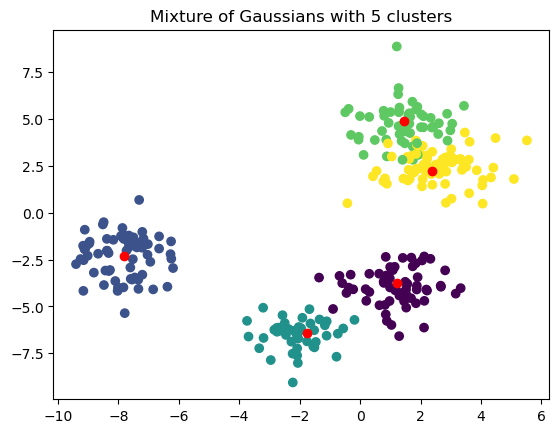

In [2]:
import random
random.seed(34)
np.random.seed(34)

#Hyperparamete
n=300 #Number of data points
sigma = 5 #standard deviation of the prior
K = 5 #Number of clusters
dim = 2 #Dimension of the data

data_dict = {"means": np.random.normal(0.0, sigma, size=(K, dim)),
                "data" : [],
                "categories":[]  }

for i in range(n):
    # sample component assignment
    cat = np.random.choice(K)
    data_dict["categories"].append(cat)
    # sample data point from the Gaussian (multivariate)
    data_dict["data"].append(np.random.multivariate_normal(data_dict["means"][cat, :], np.eye(dim)))

data_dict["data"] = np.stack(data_dict["data"])

GMM = data_dict

plt.scatter(GMM["data"][:,0],GMM["data"][:,1], c=GMM["categories"])
plt.scatter(GMM["means"][:, 0], GMM["means"][:, 1], c='r')
plt.title("Mixture of Gaussians with 5 clusters")
plt.show()


Ainsi dans ce modèle de mélanges de gaussiennes, la densité jointe des variables latentes et observée est 

$$ p(\mu,c,x) = p(\mu)\prod_{i=1}^{n}p(c_i)p(x_i|c_i,\mu) $$ 

Les variables latentes sont dans ce cas $z = \{\mu,c\}$

Dans le cadre de la famille variationelle mean-field, les densités à posteriori des variables latentes sont approximées par des formes factorisées qui s'expriment ainsi :

$$ q(\mu,c) = \prod_{i=1}^{K}q(\mu_k;m_k,s_k^2)\prod_{i=1}^{n}q(c_i,\varphi_i)$$

L'algorithme CAVI, utilisé pour maximiser la ELBO, exploite le résultat suivant:

$\textbf{Résultat :}$ Considérons la j ème variable latente $z_j$. La densité conditionnelle complète de $z_j$ est définie par sa densité conditionnelle sachant les observations et toutes les autres variables latentes $p(z_j|z_{-j},x)$. Les autres facteurs variationnels $q_l(z_l), l \neq j$ sont par ailleurs fixés. On a alors

$$ q_j^{*}(z_j) \propto exp(\mathbb{E}_{-j}[\text{log p}(z_j|z_{-j},x)]) $$ 

ou $q_j^{*}(z_j)$ désigne le $q_j(z_j)$ optimal.

$\textbf{Preuve :}$

$$
\begin{aligned} 
ELBO(q_j) & = \mathbb{E}[\log p(z_j,x)] - \mathbb{E}[\log q_j(z_j)] \\ & = \mathbb{E}_{j}[\mathbb{E}_{-j}[\log p(z_j,z_{-j},x)]] - \mathbb{E}_{j}[\log q_j(z_j)] + const \\ & = const - \mathcal{D}_{KL}(q_j(z_j)||\underbrace{\text{exp}(\mathbb{E}_{-j}[\log p(z_j,z_{-j},x)])}_{\text{on veut minimiser ça}})
\end{aligned} $$

Il vient donc naturellement de prendre $q_j^*\left(z_j\right) \propto \exp \left\{\mathbb{E}_{-j}\left[\log p\left(z_j \mid \mathbf{z}_{-j}, \mathbf{x}\right)\right]\right\}$


L'algorithme CAVI repose sur le calcul de l'ELBO. Exprimons donc l'ELBO dans le cas du mélange de gaussiennes : 

$$ ELBO(m,s^2,\varphi) = \underbrace{\sum_{k=1}^{K}\mathbb{E}[\text{log p}(\mu_k);m_k,s_k^2]}_{T_1} \\ + \underbrace{\sum_{i=1}^{n}\mathbb{E}[\text{log p}(c_i);\varphi_i]}_{T_2} + \underbrace{\sum_{i=1}^{n}\mathbb{E}[\text{log p}(x_i|c_i,\mu);\varphi_i,m,s^2]}_{T_3} \\ - \underbrace{\sum_{i=1}^{n}\mathbb{E}[\text{log q}(c_i,\varphi_i)]}_{T_4} - \underbrace{\sum_{k=1}^{K}\mathbb{E}[\text{log q}(\mu_k; m_k, s_k^2)]}_{T_5} $$

On remarque que l'ELBO s'exprime sous forme de cinq termes $T_1,...,T_5$. A l'aide de calculs, il est possible d'obtenir une expression simplifiée de ces termes

$\textbf{Terme 1}:$ 

$$ \sum_{k=1}^{K}\mathbb{E}[\text{log p}(\mu_k)] = \sum_{k=1}^{K}\mathbb{E}[\text{log}(\frac{1}{(2\pi\sigma^2)^{\frac{p}{2}}}\text{exp}(\frac{-\mu_k^T\mu_k}{2\sigma^2}))] \\
= -\frac{Kp}{2}\text{log}(2\pi\sigma^2) -\frac{1}{2\sigma^2}\sum_{k=1}^{K}(ps_k^2 + m_k^Tm_k) $$

$\textbf{Terme 2}:$

$$ \sum_{i=1}^{n}\mathbb{E}[\text{log p}(c_i)] = \sum_{i=1}^{n}\mathbb{E}[\text{log}\frac{1}{K}] = -n\text{log}(k) $$ 

$\textbf{Terme 3}:$

$$ p(x_i|c_i,\mu) = \prod_{i=1}^{k}p(x_i|\mu_k)^{c_{i,k}} $$

Donc : 

$$ \sum_{i=1}^{n}\mathbb{E}[\text{log p}(x_i|c_i,\mu)] = \sum_{i=1}^{n}\sum_{k=1}^{K}\mathbb{E}_{\mu,c}[c_{i,k}\text{log p}(x_i|\mu_k)] \\ = \sum_{i=1}^{n}\sum_{k=1}^{K}\varphi_{i,k}\mathbb{E}_{\mu}[\text{log p}(x_i|\mu_k)] \\ = \sum_{i=1}^{n}\sum_{k=1}^{K}\varphi_{i,k}\mathbb{E}_{\mu}[\text{log}(\frac{1}{(2\pi)^{\frac{p}{2}}}exp(\frac{-(x_i-\mu_k)^{T}(x_i-\mu_k)}{2}))] \\ 
= -\frac{p}{2}\text{log}(2\pi)\sum_{i=1}^{n}\sum_{k=1}^{K}\varphi_{i,k} - \frac{1}{2}\sum_{i=1}^{n}\sum_{k=1}^{K}\varphi_{i,k}(x_i^Tx_i - 2x_i^Tm_k + ps_k^2 + m_k^Tm_k) $$

$ \textbf{Terme 4}:$



$$
\begin{aligned}
\sum_{k=1}^K E_q\left[\log q\left(\mu_k\right)\right] & =\sum_{k=1}^K E_q\left[\log \frac{1}{\left(2 \pi s_k^2\right)^{\frac{2}{2}}} \exp \left(\frac{-\left(\mu_k-m_k\right)^T\left(\mu_k-m_k\right)}{2 s_k^2}\right)\right] \\
& =\sum_{k=1}^K\left(-\frac{p}{2} \log \left(2 \pi s_k^2\right)-\frac{1}{2 s_k^2}\left(E_q\left[\mu_k^T \mu_k\right]-E_q\left[\mu_k^T m_k\right]-E_q\left[m_k^T \mu_k\right]+E_q\left[m_k^T m_k\right]\right)\right) \\
& =\sum_{k=1}^K-\frac{p}{2} \log \left(2 \pi s_k^2\right)-\sum_{k=1}^K \frac{1}{2 s_k^2}\left(m_k^T m_k+p s_k^2-m_k^T m_k-m_k m_k^T+m_k^T m_k\right) \\
& =\sum_{k=1}^K-\frac{p}{2} \log \left(2 \pi s_k^2\right)-\frac{K p}{2}
\end{aligned}
$$

$\textbf{Terme 5}:$

$$
\sum_{i=1}^N E_q\left[\log q\left(c_i\right)\right]=\sum_{i=1}^N \sum_{k=1}^K \varphi_{i, k} \log \varphi_{i, k}
$$


Implémentons à présent une fonction qui effectue tous ces calculs sur nos données.

In [3]:
def compute_elbo(data, phi, m, s2, sigma2, mu0):
    """ Computes the ELBO. The elbo terms are numbered elbo_i where i corresponds to the term number 
    in the report.
    
    Parameters
    ----------
    data : numpy.ndarray
        The data, of shape (n, dim)
    psi : numpy.ndarray
        Parameters of categorical posterior over mixture assignment.
        Of shape (n, k).
    m : numpy.ndarray
        Mean parameters of the Gaussian posterior over each component’s mean parameter.
        Of shape (k, p) where p is the dimesionality of the data.
    s2 : numpy.ndarray
        Variance (std squared) of the Gaussian posterior over each component’s mean parameter.
        Of shape (k, 1) 
    sigma2 : numpy.ndarray
        Variance of the Gaussian of the prior mean per cluster.
    mu0 : numpy.ndarray
        Mean of the Gaussian of the prior mean per cluster.
        Of shape (p, ) where p is the dimensioanlity of the data.
        
    Returns
    -------
    elbo : float
        ELBO.
    """
    n, p = data.shape
    K = m.shape[0]

    elbo = 0

    #Term 1
    T_1 = -0.5 * (p * K * np.log(2*np.pi * sigma2))
    
    T_1_int = 0
    for k in range(K):
        T_1_int += \
            p * s2[k] + np.dot(m[k].T, m[k]) \
            - np.dot(m[k].T, mu0) \
            - np.dot(mu0.T, m[k]) \
            - np.dot(mu0.T, mu0)
    
    T_1 += -0.5 * sigma2**(-1) * T_1_int

    
    # Term 2
    T_2 = - n * np.log(k)
    
    #Term 3

    T_3 = 0
    
    for n_idx in range(n):
        for k in range(K):
            T_3 += \
                phi[n_idx, k] * \
                (
                    -0.5 * p * np.log(2*np.pi) \
                    -0.5 *  \
                    (
                        np.dot(data[n_idx,:].T, data[n_idx,:]) \
                        - np.dot(data[n_idx,:].T, m[k]) \
                        - np.dot(m[k].T, data[n_idx,:]) \
                        + s2[k] * p \
                        + np.dot(m[k].T, m[k])
                    ) 
                )

    #Term 4
    
    T_4 = 0
    
    for k in range(K):
        T_4 += np.log(2*np.pi) + 2 * np.log(s2[k]) + 1

    #Term 5
    
    T_5 = 0
    
    for n_idx in range(n):
        for k in range(K):
            T_5 -= phi[n_idx, k] * np.log(phi[n_idx, k])
    
    
    # sum up elbo
    elbo = T_1 + T_2 + T_3 + T_4 + T_5
    
    return elbo

L'algorithme CAVI sert à maximiser la ELBO par mise à jour des paramètres variationnels un à un, en gardant les autres fixés. Cette mise à jour se fait par des calculs précis. En effet , des calculs donnent que pour l'assignement de cluster, la mise à jour du paramètre $\varphi_{i,k}$ est donnée par 

$$
\varphi_{i k} \propto \exp \left\{\mathbb{E}\left[\mu_k ; m_k, s_k^2\right] x_i-\mathbb{E}\left[\mu_k^2 ; m_k, s_k^2\right] / 2\right\}
$$

Les mises à jour pour $q(\mu_k)$ sont :

$$
m_k=\frac{\sum_i \varphi_{i k} x_i}{1 / \sigma^2+\sum_i \varphi_{i k}}, \quad s_k^2=\frac{1}{1 / \sigma^2+\sum_i \varphi_{i k}} .
$$

Maintenant que la ELBO est calculée, nous pouvons appliquer l'algorithme CAVI par le biais de cette fonction.

In [4]:
def cavi(data, k, sigma2, m0, eps=1e-15):
    """ Coordinate ascent Variational Inference for Bayesian Mixture of Gaussians
    
    Parameters
    ----------
    data : numpy.ndarray
        The data, of shape (n, dim)
    k : int
        Number of clusters.
    sigma2 : numpy.ndarray
        Variance of the Gaussian of the prior mean per cluster.
        Of shape (), since it is a float
    m0 : numpy.ndarray
        Mean of the Gaussian of the prior mean per cluster.
        Of shape (p, ) where p is the dimensioanlity of the data.
    eps : float
        Convergence criterion.
        
    Returns
    -------
    m : numpy.ndarray
        Mean parameters of the Gaussian posterior over each component’s mean parameter.
        Of shape (k, p) where p is the dimesionality of the data.
    s2 : numpy.ndarray
        Variance (std squared) of the Gaussian posterior over each component’s mean parameter.
        Of shape (k, 1) 
    psi : numpy.ndarray
        Parameters of categorical posterior over mixture assignment.
        Of shape (n, k).

    elbo : float
        ELBO.
    """
    n, p = data.shape
    # initialize randomly
    m = np.random.normal(0., 1., size=(k, p))
    s2 = np.square(np.random.normal(0., 1., size=(k, 1)))
    phi = np.random.dirichlet(np.ones(k), size=n)

    # compute ELBO
    elbo = [compute_elbo(data, phi, m, s2, sigma2, m0)]
    convergence = 1.
    # for diagonal covariance, lambda is set to 1
    lambda_ = 1.0
    
    while convergence > eps:  # while ELBO not converged
        
        # update categorical
        for n_idx in range(n):
            for k_idx in range(k):
                phi[n_idx, k_idx] = \
                    np.exp(
                        np.dot(data[n_idx].T, m[k_idx]) * lambda_**(-2) \
                        - 0.5 * lambda_**(-2) * (np.dot(m[k_idx].T, m[k_idx]) + p*s2[k_idx])
                    )
            phi[n_idx] /= np.sum(phi[n_idx])
        
        # update posterior parameters for the component means
        for k_idx in range(k):
            for n_idx in range(n):
                s2[k_idx] += lambda_**(-2) * phi[n_idx, k_idx]
            
            s2[k_idx] += sigma2**(-2)
            s2[k_idx] = s2[k_idx]**(-1)
        
        for k_idx in range(k):
            for n_idx in range(n):
                m[k_idx] += phi[n_idx, k_idx] * data[n_idx]
            m[k_idx] *= lambda_**(-2)
            m[k_idx] += m0 / sigma2
            m[k_idx] *= s2[k_idx]
        
        # compute ELBO
        elbo.append(compute_elbo(data, phi, m, s2, sigma2, m0))
        convergence = elbo[-1] - elbo[-2]

    return m, s2, phi, elbo

Appliquons à présent l'algorithme CAVI sur notre mélange de gaussiennes

In [5]:
from tqdm import tqdm

# parameters
p = 2
K = 5
sigma = 5.

m = list()
s2 = list()
phi = list()
elbo = list()
best_i = 0

for i in tqdm(range(10)):
    
    m_i, s2_i, phi_i, elbo_i = cavi(GMM["data"], k=K, sigma2=sigma, m0=np.zeros(p))
    m.append(m_i)
    s2.append(s2_i)
    phi.append(phi_i)
    elbo.append(elbo_i)
    
    if i > 0 and elbo[-1][-1] > elbo[best_i][-1]:
        best_i = i


  0%|          | 0/10 [00:00<?, ?it/s]

100%|██████████| 10/10 [00:21<00:00,  2.14s/it]


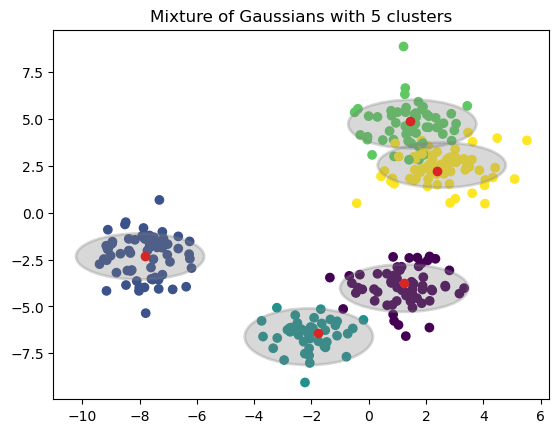

In [6]:
last_m = m[-1]
last_s = s2[-1]
from matplotlib.patches import Ellipse

plt.scatter(GMM["data"][:,0],GMM["data"][:,1], c=GMM["categories"])
plt.scatter(GMM["means"][:, 0], GMM["means"][:, 1], c='r')
for i in range(5):
    ellipse = Ellipse((last_m[i,0],last_m[i,1]),2*np.sqrt(sigma),20*np.sqrt(last_s[i,0]),edgecolor='gray',fc='gray',alpha=0.3,lw=2)
    ax = plt.gca()
    ax.add_patch(ellipse)
plt.title("Mixture of Gaussians with 5 clusters")
plt.show()


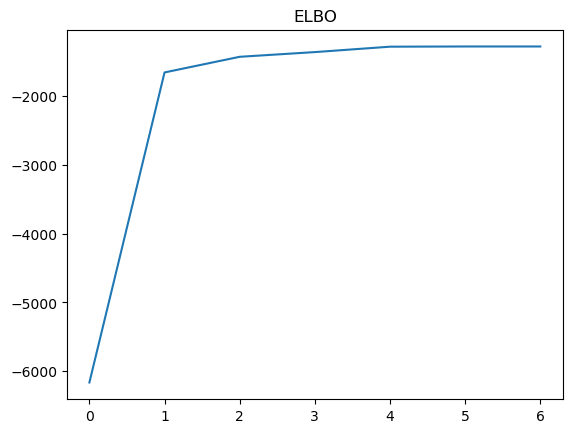

In [7]:
plt.plot(elbo[best_i])
plt.title("ELBO")
plt.show()

### III - Application d'une méthode variationnelle pour un modèle bayésien de régression linéaire

Le modèle suppose une relation linéaire entre les entrées x (de dimension d) et les sorties y (de dimension d) avec un bruit gaussien à variance constante, de sorte que la probabilité des données est : 

$$ p(y|x, \:\beta, \:\tau) = \mathcal{N}(\:y|\beta^{t}x\: , \;\tau^{-1}) = (\frac{\tau }{2\pi})^{1/2} \: exp\:(-\frac{\tau}{2}(y - \beta^{t}x)^2). \\ $$

Étant donné toutes les données $\mathcal{D}$ = $\{\textbf{X}, \textbf{Y} \}$, avec $\textbf{X} = \{x_1, . . . , x_N\}$ et $\textbf{Y}$ = $\{y_1, . . . , y_N\}$, la vraisemblance des données est : 

$$ p(\textbf{Y}|\textbf{X}, \:\beta, \:\tau) = \prod_{n}p(y_n|x_n, \:\beta, \:\tau) \\ $$

L'a priori sur $\beta$ et $\tau$ est donné par :
$$ p(\beta, \tau | \alpha) = \mathcal{N}(\beta|0, (\tau \alpha)^{-1}\textbf{I})\; Gamma(\tau | a_0, b_0) = (\frac{\alpha}{2\pi})^{d/2} \: \frac{b_0^{a_0}}{\Gamma(a_0)} \: \tau^{d/2 + a_0 - 1} \: exp(-\frac{\tau}{2}(\alpha \beta^t \beta + 2b_0))\\ $$

Et l'hyper-paramètre $\alpha$ admet :

$$ p(\alpha) = Gamma(\alpha | c_0, d_0) = \frac{1}{\Gamma(a_0)} \: d_0^{c_0} \: \alpha^{c_0 - 1} \: exp\: (-d_0\alpha) \\ $$

Les paramètres $\;a_0,\: b_0,\: c_0 \;et\; d_0\;$ sont des hyper-paramètres fixés. La variable latente $\alpha$ détermine la pertinence de chaque coefficient de la régression.

L'a posteriori $\; p(\beta, \tau, \alpha | y , x)\;$ n'est pas disponible sous forme fermée.


On suppose la distribution variationnelle $\:q(\beta, \tau, \alpha)\:$, qui approche l'a posteriori $\; p(\beta, \tau, \alpha | y , x)\;$ et qui se décompose en $\:q(\beta, \tau)\:q(\alpha).\:$

En utilisant les résultats que l'on a rappelé en partie I sur l'inférence variationnelle, l'a posteriori variationnel pour $\:\beta\:$ et $\:\tau\:$ qui maximise la borne variationnelle $\:ELBO(q_\phi)\:$ tout en maintenant $q(\alpha)$ fixée, est donnée par :

$$\;\;\; ln\:q^*(\beta, \tau) \;\;\;=\;\;\; ln\:p(\textbf{Y}|\textbf{X}, \beta, \tau) + \mathbb{E}_\alpha[ln\:p(\beta, \tau|\alpha)] + K \\ \;\;\;=\;\;\; \left(\frac{d}{2} + a_0 - 1 + \frac{N}{2}\right)\:ln(\tau) \:-\: \frac{\tau}{2}\left(\:\beta^t\left(\mathbb{E}_\alpha[\alpha]\textbf{I} \:+\: \sum_{n}x_nx_n^t\right)\beta \:+\: \sum_{n}y_n^2 \:-\: 2\beta^t\sum_{n}x_ny_n \:+\: 2b_0\right) \;+\; K \\ \;\;\;=\;\;\; ln\:\mathcal{N}\left(\beta|\beta_N, \tau^{-1}\textbf{V}_N\right)\; Gamma(\tau | a_N, b_N) \\ $$

avec

$$ \textbf{V}_N^{-1} \;\;=\;\; \mathbb{E}_\alpha[\alpha]\:\textbf{I} \;+\; \sum_{n}x_nx_n^t, $$

$$ \beta_N \;\;=\;\; \textbf{V}_N \: \sum_{n}x_ny_n, $$

$$ a_N \;\;=\;\; a_0 \:+\: \frac{N}{2}, $$

$$ b_N \;\;=\;\; b_0 \:+\: \frac{1}{2}\;\left(\sum_{n}y_n^2 \:-\: \beta_N^t \textbf{V}_N^{-1} \beta_N\right) \;\;=\;\; \frac{1}{2}\;\left(\sum_{n}\left(y_n \:-\: \beta_N^t x_n\right)^2 \;+\; \mathbb{E}_\alpha[\alpha]\beta_N^t\beta_N\right). \\ $$




L'a posteriori variationnel pour $\alpha$ est :

$$ \;\;\; ln\:q^*(\alpha) \;\;\;=\;\;\; ln\:p(\alpha) + \mathbb{E}_{\beta, \tau}[ln\:p(\beta, \tau|\alpha)] + K \\ \;\;\;=\;\;\; \left(c_0 - 1 + \frac{d}{2}\right)\:ln(\alpha) \:-\: \alpha\left(\:d_0 \:-\: \frac{1}{2} \mathbb{E}_{\beta, \tau}[\tau \: \beta^t \beta]\right) \;+\; K \\ \;\;\;=\;\;\; ln\:Gamma(\alpha | c_N, d_N) \\ $$

avec 

$$ c_N \;\;=\;\; c_0 \:+\: \frac{1}{2}, $$

$$ d_N \;\;=\;\; d_0 \:+\: \frac{1}{2} \mathbb{E}_{\beta, \tau}[\tau \: \beta^t \beta]. \\ $$



Les espérances sont données ainsi : 

$$ \mathbb{E}_{\beta, \tau}[\tau \: \beta^t \beta] \;=\; \frac{a_N}{b_N}\beta_N^t \beta \:+\: Tr(\textbf{V}_N) \;\;\;\;\; et \;\;\;\;\; \mathbb{E}_\alpha[\alpha] \;=\; \frac{c_N}{d_N}. \\ $$


La borne variationnelle $\:ELBO(q_\phi)\:$ est maximisée par itération sur les mises à jour de $\textbf{V}_N, \beta_N, a_N, b_N, c_N \;et\; d_N $ jusqu'à ce que $\:ELBO(q_\phi)\:$ atteigne un plateau.
$$ \\ $$ 

La borne variationnelle mis à jour est donnée par :

$$ ELBO(q_\phi) \;\;\;=\;\;\; -\frac{N}{2}\:ln\:2\pi \;-\; \frac{1}{2}\sum_{n}\left(\frac{a_N}{b_N}\left(y_n \:-\: \beta_N^t x_n\right)^2 \:+\:
x_n^t\textbf{V}_Nx_N\right) \;+\;  \frac{1}{2}ln|\textbf{V}_N| \;+\; \frac{d}{2} \;-\; ln\:\Gamma(a_0) \;+\; a_0\:ln\:b_0 \;-\; 
b_0\frac{a_N}{b_N} \;\\+\; ln\:\Gamma(a_N) \;-\; a_N\:ln\:b_N \;+\; a_N \;-\; ln\:\Gamma(c_0) \;+\; c_0\:ln\:d_0 \;-\;
ln\:\Gamma(c_N) \;-\; c_N\:ln\:d_N \\ $$

$$ \\ $$

La densité à prédire $\; p(y|x, \mathcal{D})\;$ est évaluée en approchant l'a posteriori $\:p(\beta, \tau |\mathcal{D})\:$ par sa contrepartie variationnelle $\:q^*(\beta, \tau)\:$.

La distribution résultante est une distribution t de Student de moyenne $\;\beta_N^tx\;$, de précision $\;(1 + x^t \textbf{V}_N x)^{-1}\frac{a_N}{b_N}\;$ , et de degrés de liberté $\:2\:a_N\:$. La variance résultante est $\;(1 + x^t \textbf{V}_N x)\:\frac{b_N}{a_N − 1}\;$.



##### Initialisation des valeurs initiales et variables fixes :

In [8]:
sample = 100
a_0, b_0, c_0, d_0 = 10**-2, 10**-4, 10**-2, 10**-4
max_iter = 100
epsilon = 1e-50

##### Setup des données :

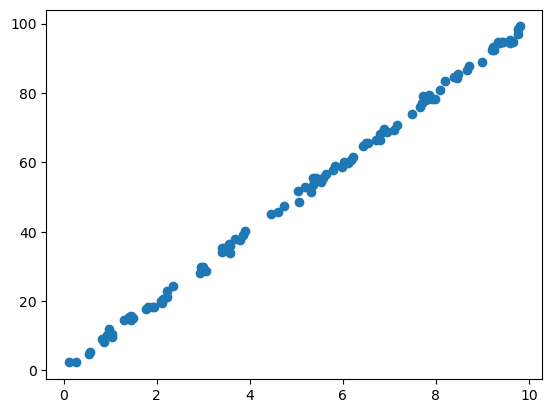

In [9]:
X = np.random.uniform(0,10,size=sample)
y = 10*X + np.random.normal(0,1,size=sample)
X = X.reshape((-1,1))
plt.scatter(X,y)
y = y.reshape((-1,1))

##### Algorithm CAVI adapté à notre modèle

In [10]:
def CAVI_Bayesian_Inference(X, y, a_N, b_N, c_N, d_N, max_iter, epsilon):
    """
    Inputs
    ----------
    X : Data
    y : the response
    a_0, b_0 : prior parameters 
    c_0, d_0 : hyperprior parameters for alpha
    max_iter : stopping criterion
    
    
    Outputs
    -------
    BETA : posterior weight D-element mean vector
    VN : posterior weight D x D covariance matrix
    invV : inverse of V
    a_N, b_N : scalar posterior parameter of noise precision
    E_a : scalar mean E(alpha) 
    ELBOS : variational bounds
    """
    
    N, D = X.shape
    X_corr = X.T @ X
    Xy_corr = X.T @ y
    a_N = a_0 + N / 2   
    gammaln_an = gammaln(a_N)
    c_N = c_0 + 1 / 2   
    gammaln_cn = gammaln(c_N)


    # iterate to find hyperparameters
    L_last = -1e-30
    E_a = c_0 / d_0
    ELBOS = []
    BETA = []
    VN = []
    
    for i in range(max_iter) :
        # covariance and weight of linear model
        invV = E_a * np.eye(D) + X_corr
        V = np.linalg.inv(invV)
        logdetV = - np.linalg.slogdet(invV)[1]
        B = V * Xy_corr

        # parameters of noise model (an remains constant)
        res = np.sum(np.power(X @ B - y,2))
        b_N = b_0 + 0.5 * (res + E_a * (B.T @ B))
        E_t = a_N / b_N

        # hyperparameters of covariance prior (cn remains constant)
        d_N = d_0 + 0.5 * (E_t * (B.T @ B) + np.trace(V))
        E_a = c_N / d_N

        # variational bound
        a = - 0.5 * (E_t * res + np.sum(np.sum(np.multiply(X,X @ V))))
        b =  0.5 * logdetV - b_0 * E_t 
        c = gammaln_an - a_N * np.log(b_N)
        d = a_N + gammaln_cn - c_N * np.log(d_N)
        e = - 0.5 * (N * np.log(2 * np.pi) - D) - gamma(a_0) + a_0 * np.log(b_0)- gammaln(c_0) + c_0 * np.log(d_0)
        ELBO = a + b + c + d + e
        
        BETA.append(B)
        VN.append(V)
        ELBOS.append(ELBO)
        
        if L_last > ELBO:
            print('Last bound : '+ str(L_last))
            print('Current bound : '+str(ELBO))
            print('Variational bound should not reduce')

        # stop if change in variation bound is < epsilon
        if abs(L_last - ELBO) < abs(epsilon * ELBO) :
            break
        L_last = ELBO       
        
    return BETA, VN, invV, a_N, b_N, E_a, ELBOS

##### Réarrangement des vecteurs pour pouvoir les dessiner (pas très élégant) :

In [11]:
BETA, VN, invV, a_N, b_N, E_a, ELBOS = CAVI_Bayesian_Inference(X, y, a_0, b_0, c_0, d_0, max_iter, epsilon)
elbos = np.zeros((len(ELBOS)))
for k in range (len(ELBOS)) :
    elbos[k] = ELBOS[k][0][0]
    
beta = np.zeros((len(BETA)))
for k in range (len(BETA)) :
    beta[k] = BETA[k][0][0]

vn = np.zeros((len(VN)))
for k in range (len(VN)) :
    vn[k] = VN[k][0][0]

Last bound : -1e-30
Current bound : [[-431.52227338]]
Variational bound should not reduce
Last bound : [[-250.12897702]]
Current bound : [[-250.12897702]]
Variational bound should not reduce


##### Convergence de la borne ELBO

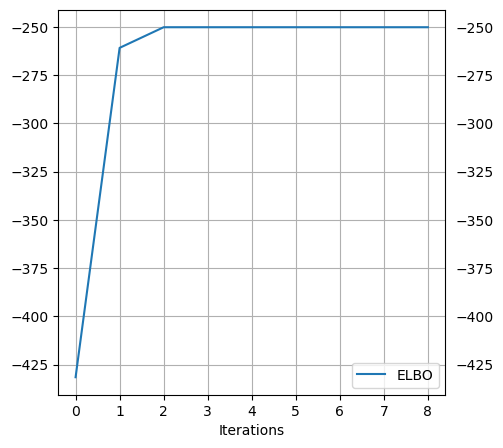

In [12]:
fig = plt.figure(figsize=(5,5))
plt.plot(elbos, label = 'ELBO')
plt.tick_params(labelright=True)
plt.grid(True)
plt.xlabel('Iterations')
plt.legend();

##### Convergence des estimateurs $\; \beta_N \;et\; \textbf{V}_N\;$.

Text(0.5, 1.0, 'Estimation of beta_N')

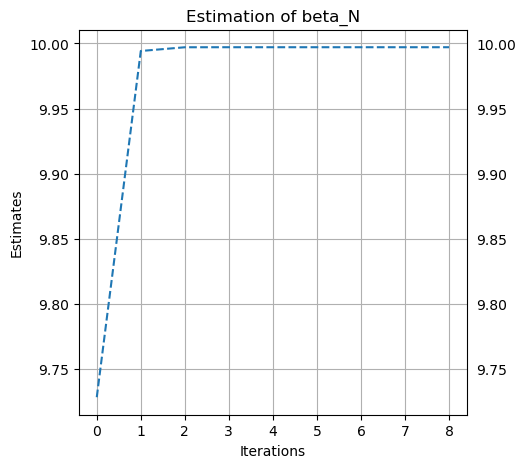

In [13]:
fig = plt.figure(figsize=(5,5))
plt.plot(beta, '--', label = 'beta_N')
plt.tick_params(labelright=True)
plt.grid(True)
plt.ylabel('Estimates')
plt.xlabel('Iterations')
plt.title('Estimation of beta_N')

Text(0.5, 1.0, 'Estimation of V_N')

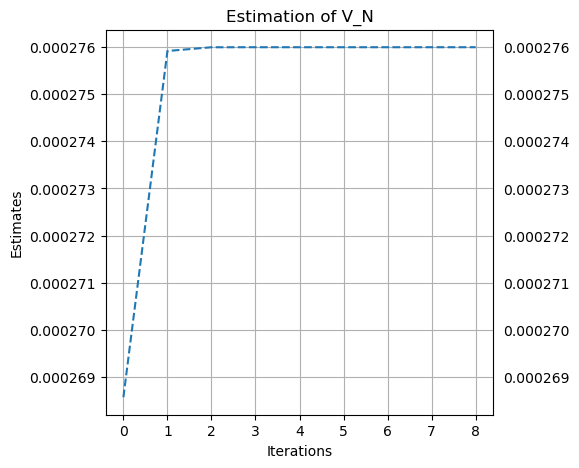

In [14]:
fig = plt.figure(figsize=(5,5))
plt.plot(vn, '--', label = 'V_N')
plt.tick_params(labelright=True)
plt.grid(True)
plt.ylabel('Estimates')
plt.xlabel('Iterations')
plt.title('Estimation of V_N')